Frequency Distribution:
0: 28.8786% occurrences
1: 12.8987% occurrences
2: 12.1194% occurrences
3: 9.8436% occurrences
4: 7.8159% occurrences
5: 6.2333% occurrences
6: 4.8201% occurrences
7: 3.8023% occurrences
8: 13.5882% occurrences

Average Length: 2.93


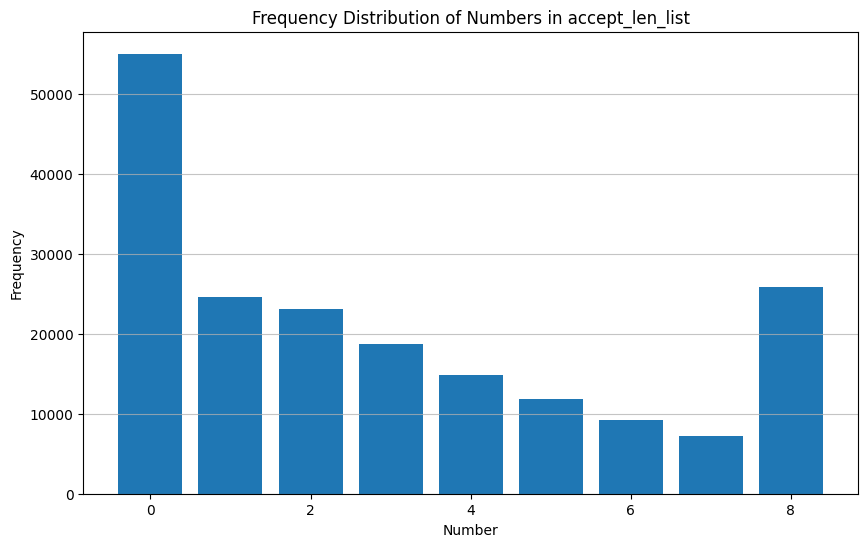

In [2]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import os

def process_jsonl_file(file_path, output_dir):
    # 初始化统计变量
    frequency = defaultdict(int)
    total_numbers = 0
    sum_lengths = 0
    
    # 读取并处理JSONL文件
    with open(file_path, 'r') as file:
        for line in file:
            try:
                data = json.loads(line)
                accept_len_list = data.get('accept_len_list', [])
                
                # 遍历所有子列表
                for sublist in accept_len_list:
                    for num in sublist:
                        frequency[num] += 1
                        sum_lengths += num
                        total_numbers += 1
            except json.JSONDecodeError:
                print(f"Warning: Could not parse line: {line}")
    
    if total_numbers == 0:
        print("No valid data found in the file.")
        return
    
    # 计算平均长度
    average_length = sum_lengths / total_numbers
    
    # 打印统计信息
    print("Frequency Distribution:")
    for num in sorted(frequency.keys()):
        print(f"{num}: {frequency[num]/total_numbers:.4%} occurrences")
    
    print(f"\nAverage Length: {average_length:.2f}")
    
    # 生成直方图
    plt.figure(figsize=(10, 6))
    plt.bar(sorted(frequency.keys()), [frequency[k] for k in sorted(frequency.keys())])
    plt.title('Frequency Distribution of Numbers in accept_len_list')
    plt.xlabel('Number')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    
    plt.show()
    # # 保存直方图
    # output_path = os.path.join(output_dir, 'accept_len_frequency13-t1.png')
    # plt.savefig(output_path, dpi=300, bbox_inches='tight')
    # print(f"\nHistogram saved to: {output_path}")

# 使用示例
file_path = '../output/shareGPT/llama3.1/t1d7/eagle3-acclen.jsonl'  # 替换为您的文件路径
output_dir = '../output/shareGPT/llama3.1/t1d7/eagle3/'
process_jsonl_file(file_path, output_dir)